In [1]:
import numpy as np

# Income of 3 depertments each month over a 10-month period
no_tax = np.array([[20000, 23000, 34000, 41000, 35000, 26000, 47000, 18000, 29000, 30000],
                  [12000, 15000, 38000, 25000, 37000, 24000, 36000, 24000, 17000, 21000],
                  [64000, 63000, 82000, 71000, 83000, 63000, 79000, 83000, 77000, 71000]])
print("Incomes before tax\n", no_tax)

# 30% Tax
w_tax = no_tax - (no_tax * 0.3)
print("Income after tax\n", w_tax)

# Adjusted Tax
a = np.array([0.7, 0.7, 0.7, 0.7, 0.6, 0.6, 0.6, 0.7, 0.7, 0.7]) 
adj_tax = no_tax * a
print("Income with adjusted tax\n", adj_tax)

# Second Quarter
q_2 = adj_tax[:, 3:6]
print("Second quarter income\n", q_2)


Incomes before tax
 [[20000 23000 34000 41000 35000 26000 47000 18000 29000 30000]
 [12000 15000 38000 25000 37000 24000 36000 24000 17000 21000]
 [64000 63000 82000 71000 83000 63000 79000 83000 77000 71000]]
Income after tax
 [[14000. 16100. 23800. 28700. 24500. 18200. 32900. 12600. 20300. 21000.]
 [ 8400. 10500. 26600. 17500. 25900. 16800. 25200. 16800. 11900. 14700.]
 [44800. 44100. 57400. 49700. 58100. 44100. 55300. 58100. 53900. 49700.]]
Income with adjusted tax
 [[14000. 16100. 23800. 28700. 21000. 15600. 28200. 12600. 20300. 21000.]
 [ 8400. 10500. 26600. 17500. 22200. 14400. 21600. 16800. 11900. 14700.]
 [44800. 44100. 57400. 49700. 49800. 37800. 47400. 58100. 53900. 49700.]]
Second quarter income
 [[28700. 21000. 15600.]
 [17500. 22200. 14400.]
 [49700. 49800. 37800.]]


In [2]:
# Task_1

import pandas as pd

df1 = pd.DataFrame(no_tax, index=['dept_1', 'dept_2', 'dept_3'], columns=['Jan', 'Feb', 'Mar', 'Apr', 'May', 
                                                                          'Jun', 'Jul', 'Aug', 'Sep', 'Oct'])
print(df1)


          Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct
dept_1  20000  23000  34000  41000  35000  26000  47000  18000  29000  30000
dept_2  12000  15000  38000  25000  37000  24000  36000  24000  17000  21000
dept_3  64000  63000  82000  71000  83000  63000  79000  83000  77000  71000


In [3]:
# Adding an additional row showing the tax rates in different months
tax = [4000, 7000, 3000, 5000, 4400, 3600, 6900, 5700, 4000, 6000]
df1.loc['tax'] = tax
print(df1)

          Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct
dept_1  20000  23000  34000  41000  35000  26000  47000  18000  29000  30000
dept_2  12000  15000  38000  25000  37000  24000  36000  24000  17000  21000
dept_3  64000  63000  82000  71000  83000  63000  79000  83000  77000  71000
tax      4000   7000   3000   5000   4400   3600   6900   5700   4000   6000


In [46]:
# DataFrame that stores net income per department by month

print('Net Income')
df2 = df1.copy()
df2 = df2.drop('tax')
df2 = df2 - tax
print(df2)

Net Income
          Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct
dept_1  16000  16000  31000  36000  30600  22400  40100  12300  25000  24000
dept_2   8000   8000  35000  20000  32600  20400  29100  18300  13000  15000
dept_3  60000  56000  79000  66000  78600  59400  72100  77300  73000  65000


In [27]:
# Calculated the average income of each department

df2['Avg_income'] = df2.mean(axis=1)
df_avg = df2.loc[:, 'Avg_income']
print(df_avg)

dept_1    25340.0
dept_2    19940.0
dept_3    68640.0
Name: Avg_income, dtype: float64


In [6]:
# Printing the 1st quartile (Jan, Feb, Mar)

df3 = df2.loc[:, 'Jan':'Mar']
print(df3)

          Jan    Feb    Mar
dept_1  16000  16000  31000
dept_2   8000   8000  35000
dept_3  60000  56000  79000


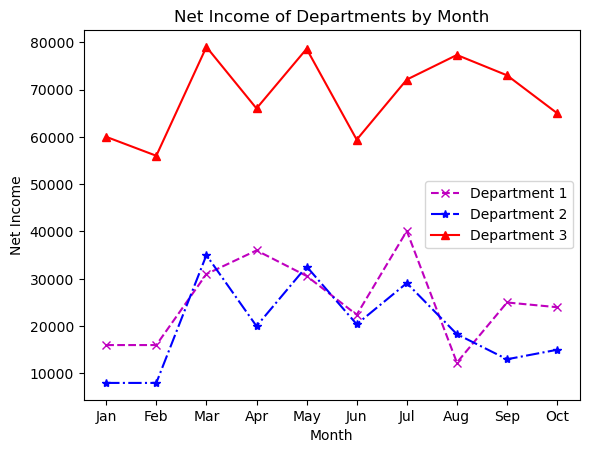

     dept_1  dept_2  dept_3
Jan   16000    8000   60000
Feb   16000    8000   56000
Mar   31000   35000   79000
Apr   36000   20000   66000
May   30600   32600   78600
Jun   22400   20400   59400
Jul   40100   29100   72100
Aug   12300   18300   77300
Sep   25000   13000   73000
Oct   24000   15000   65000


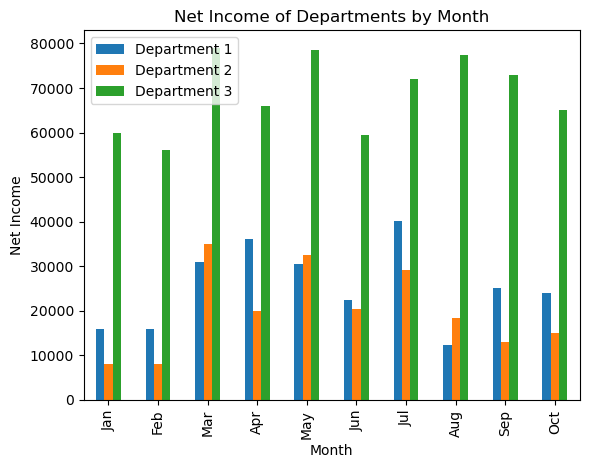

dept_1    25340.0
dept_2    19940.0
dept_3    68640.0
Name: Avg_income, dtype: float64


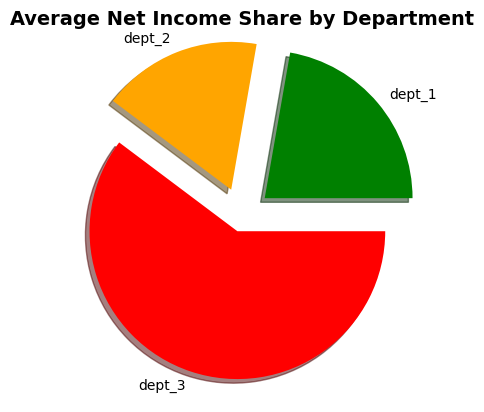

In [57]:
# Task_2
# Graph of net income by month

import matplotlib.pyplot as plt

# Plot
df4 = df2.transpose()
plt.plot(df4.index, df4['dept_1'], 'x--m')
plt.plot(df4.index, df4['dept_2'], '*-.b')
plt.plot(df4.index, df4['dept_3'], '^-r')
plt.title('Net Income of Departments by Month', fontsize=12)
plt.xlabel('Month')
plt.ylabel('Net Income')
plt.legend(['Department 1', 'Department 2', 'Department 3'])
plt.show()
print(df4)

# Bar
df4[['dept_1', 'dept_2', 'dept_3']].plot(kind='bar')

plt.title('Net Income of Departments by Month', fontsize=12)
plt.xlabel('Month')
plt.ylabel('Net Income')
plt.legend(['Department 1', 'Department 2', 'Department 3'])
plt.show()



# Pie
print(df_avg)
explode1 = [0.2, 0.2, 0.1]
my_colors = ['green', 'orange', 'red']
plt.pie(df_avg, labels=df_avg.index, colors=my_colors, explode=explode1, shadow=True)
plt.title('Average Net Income Share by Department', fontsize=14, fontweight='bold')
plt.show()

In [2]:
# Task 3

import seaborn as sns

car_cr = sns.load_dataset('car_crashes')
print(car_cr)

    total  speeding  alcohol  not_distracted  no_previous  ins_premium  \
0    18.8     7.332    5.640          18.048       15.040       784.55   
1    18.1     7.421    4.525          16.290       17.014      1053.48   
2    18.6     6.510    5.208          15.624       17.856       899.47   
3    22.4     4.032    5.824          21.056       21.280       827.34   
4    12.0     4.200    3.360          10.920       10.680       878.41   
5    13.6     5.032    3.808          10.744       12.920       835.50   
6    10.8     4.968    3.888           9.396        8.856      1068.73   
7    16.2     6.156    4.860          14.094       16.038      1137.87   
8     5.9     2.006    1.593           5.900        5.900      1273.89   
9    17.9     3.759    5.191          16.468       16.826      1160.13   
10   15.6     2.964    3.900          14.820       14.508       913.15   
11   17.5     9.450    7.175          14.350       15.225       861.18   
12   15.3     5.508    4.437          

In [4]:
car_cr.info()
car_cr.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total           51 non-null     float64
 1   speeding        51 non-null     float64
 2   alcohol         51 non-null     float64
 3   not_distracted  51 non-null     float64
 4   no_previous     51 non-null     float64
 5   ins_premium     51 non-null     float64
 6   ins_losses      51 non-null     float64
 7   abbrev          51 non-null     object 
dtypes: float64(7), object(1)
memory usage: 3.3+ KB


,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,15.790196,4.998196,4.886784,13.573176,14.004882,886.957647,134.493137
std,4.122002,2.017747,1.729133,4.508977,3.764672,178.296285,24.835922
min,5.900000,1.792000,1.593000,1.760000,5.900000,641.960000,82.750000
25%,12.750000,3.766500,3.894000,10.478000,11.348000,768.430000,114.645000
50%,15.600000,4.608000,4.554000,13.857000,13.775000,858.970000,136.050000
75%,18.500000,6.439000,5.604000,16.140000,16.755000,1007.945000,151.870000
max,23.900000,9.450000,10.038000,23.661000,21.280000,1301.520000,194.780000


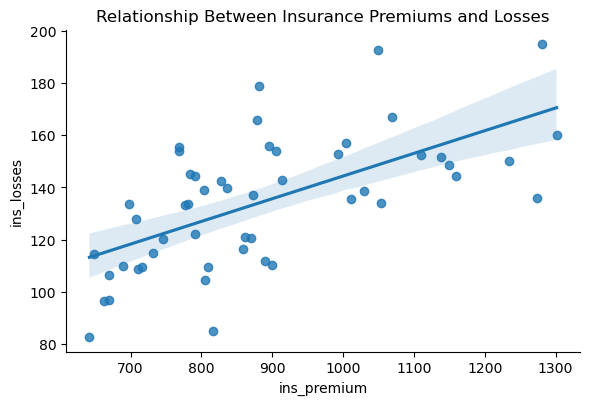

In [18]:
import matplotlib.pyplot as plt

# Regression Ins. premium vs Ins. losses
sns.lmplot(data=car_cr, x='ins_premium', y='ins_losses', height=4, aspect=1.5, scatter_kws={'alpha':0.8})
plt.title('Relationship Between Insurance Premiums and Losses')
plt.show()

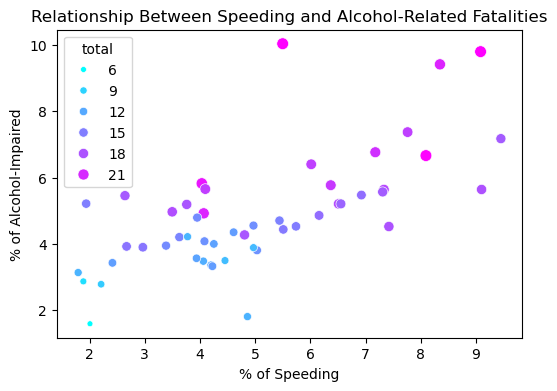

In [36]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=car_cr, x='speeding', y='alcohol', size='total', hue='total', palette='cool')
plt.title('Relationship Between Speeding and Alcohol-Related Fatalities')
plt.xlabel('% of Speeding')
plt.ylabel('% of Alcohol-Impaired')
plt.show()

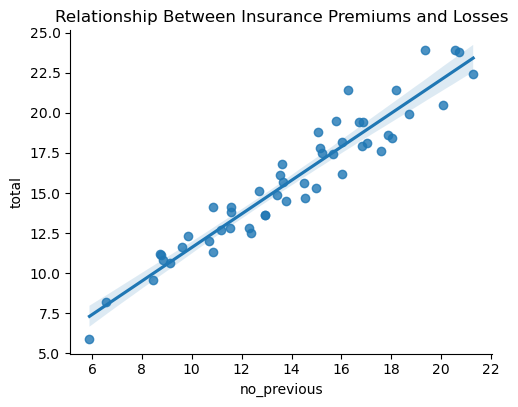

In [57]:
sns.lmplot(data=car_cr, x='no_previous', y='total', height=4, aspect=1.3, scatter_kws={'alpha':0.8})
plt.title('Relationship Between Insurance Premiums and Losses')
plt.show()